# Linear Regression

##With Numpy

In [0]:
# importing required dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# upload data from your local hdd/ssd
from google.colab import files
uploaded = files.upload()

Saving ex1data1.txt to ex1data1.txt


In [9]:
%mv ex1data1.txt linear.txt
%ls

linear.txt  sample_data/


In [10]:
# defining the data frame
df = pd.read_csv("linear.txt", sep=",", header=None)
df.columns = ['x', 'y']
df.head(10)

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [11]:
# defining the inputs and outputs 
X = pd.DataFrame(df['x'])
Y = pd.DataFrame(df['y'])

print("The input looks like this\n{}".format(X.head(10)))
print("\nOutput looks like this\n{}".format(Y.head(10)))

# Set the number of features and training examples
m = X.shape[0]
n = 2

The input looks like this
        x
0  6.1101
1  5.5277
2  8.5186
3  7.0032
4  5.8598
5  8.3829
6  7.4764
7  8.5781
8  6.4862
9  5.0546

Output looks like this
         y
0  17.5920
1   9.1302
2  13.6620
3  11.8540
4   6.8233
5  11.8860
6   4.3483
7  12.0000
8   6.5987
9   3.8166


In [12]:
# normalize the data
def normalize_data(data):
    
    return (data - data.mean()) / (data.max() - data.min())

X = normalize_data(X)
Y = normalize_data(Y)

print("After normalizing the input looks like this\n{}".format(X.head(10)))
print("\nAfter normalizing the output looks like this\n{}".format(Y.head(10)))

After normalizing the input looks like this
          x
0 -0.119334
1 -0.153242
2  0.020889
3 -0.067338
4 -0.133907
5  0.012989
6 -0.039788
7  0.024354
8 -0.097438
9 -0.180786

After normalizing the output looks like this
          y
0  0.438087
1  0.122674
2  0.291597
3  0.224204
4  0.036685
5  0.225396
6 -0.055571
7  0.229646
8  0.028313
9 -0.075390


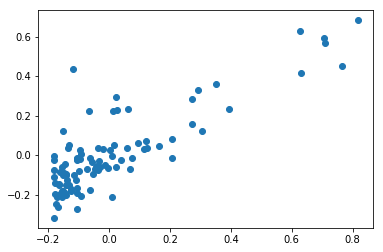

In [13]:
# visualize the data
def visualize_data(x, y):
    
    plt.plot(x, y, 'o')
    plt.show()
    
visualize_data(X, Y)

In [14]:
# Set the number of iterations, alpha and weights
iters = 7000
alpha = 0.003
weights = np.zeros((n, 1))

# adding bias to the input
X['bias'] = 0
print("\nAfter adding bias input looks like this\n{}".format(X.head(10)))


After adding bias input looks like this
          x  bias
0 -0.119334     0
1 -0.153242     0
2  0.020889     0
3 -0.067338     0
4 -0.133907     0
5  0.012989     0
6 -0.039788     0
7  0.024354     0
8 -0.097438     0
9 -0.180786     0


In [0]:
# function to generate cost
def cost(weights, x, y):
    
    x = np.array(x)
    y = np.array(y)
    sqrErr = (x.dot(weights)-y)**2
    
    return np.sum(sqrErr)/(2*m)

In [0]:
# Function reduce loss(gradient descent)
def gradDescent(weights, x, y):
    
    x = np.array(x)
    y = np.array(y)
    
    hyp = x.dot(weights)
    cost_arr = []
    
    for i in range(iters):
        
        weights -= ((alpha/m)*(x.T.dot(hyp-y)))
        cost_arr.append(cost(weights,x,y))
        
    return weights, cost_arr

weights, cost_arr = gradDescent(weights, X, Y)

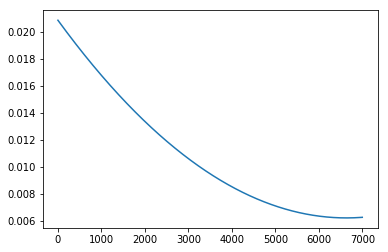

In [18]:
def visualize_cost():
    
    y_axis = np.array(cost_arr)
    x_axis = np.array([i for i in range(iters)])
    
    plt.plot(x_axis, y_axis)
    plt.show()
    
visualize_cost()

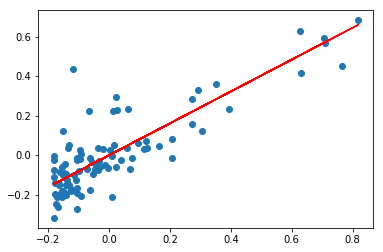

In [23]:
# plotting the line
line = X.dot(weights)

def plot_line():
    plt.plot(X['x'],Y['y'],'o')
    plt.plot(X['x'],line,'-',c='r')
    plt.show()
    
plot_line()

## With Scikit Learn

In [38]:
# import the needed libraries
from sklearn.linear_model import LinearRegression

# define the train and test set
x_train = X[:60]
y_train = Y[:60]

x_test = X[60:]
y_test = Y[60:]

print("Train input\n{}".format(x_train.head()))
print("\nTrain output\n{}".format(y_train.head()))

print("\nTest input\n{}".format(x_test.head()))
print("\nTest output\n{}".format(y_test.head()))

split = (len(X)-len(x_test))/(len(X))

print("\nTrain-Test split is {}".format(split))

Train input
          x  bias
0 -0.119334     0
1 -0.153242     0
2  0.020889     0
3 -0.067338     0
4 -0.133907     0

Train output
          y
0  0.438087
1  0.122674
2  0.291597
3  0.224204
4  0.036685

Test input
           x  bias
60  0.038752     0
61 -0.173526     0
62  0.763806     0
63  0.392883     0
64  0.628734     0

Test output
           y
60 -0.024964
61 -0.245341
62  0.450649
63  0.231659
64  0.418033

Train-Test split is 0.6185567010309279


In [48]:
# define the model
linear = LinearRegression()

# train the model
linear.fit(x_train, y_train)
linear.score(x_train, y_train)

#Equation coefficient and Intercept
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

#Predict Output
predicted = linear.predict(x_test)

Coefficient: 
 [[0.80253798 0.        ]]
Intercept: 
 [0.03056889]


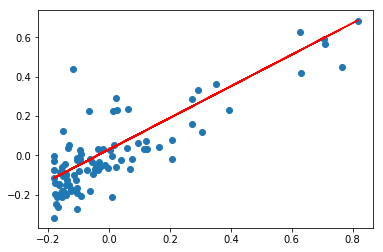

In [57]:
# plot the data and line
line = (linear.coef_[0][0]*X['x']) + linear.intercept_

def plot_skline():
    plt.plot(X['x'], Y, 'o')
    plt.plot(X['x'], line, '-', c='r')
    plt.show()    
    
plot_skline()